In [ ]:
import numpy as np
import pandas as pd
import lightgbm as lgb
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from google.colab import drive
#from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import cross_val_score, cross_validate, GridSearchCV, train_test_split
from sklearn.model_selection import KFold

In [ ]:
# Mount Google Drive.
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Read in CSV file.
df = pd.read_csv('/content/drive/MyDrive/hackathon-data/mutations_processed_joined_v5.csv')

In [ ]:
# Confirm things were read in correctly.
df.drop('Unnamed: 0', axis = 1, inplace = True)
pd.set_option('display.max_columns', None)
df.head()

,idnatmut,valeurfonc,nbdispo,l_section,nbsuf,sterr,nblocmut,nblocmai,nblocapt,nblocdep,nblocact,nbapt1pp,nbapt2pp,nbapt3pp,nbapt4pp,nbapt5pp,nbmai1pp,nbmai2pp,nbmai3pp,nbmai4pp,nbmai5pp,sbati,sbatmai,sbatapt,sbatact,sapt1pp,sapt2pp,sapt3pp,sapt4pp,sapt5pp,smai1pp,smai2pp,smai3pp,smai4pp,smai5pp,days_from_today,2014,2015,2016,2017,2018,2019,2020,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec,valeurfonc_log,sbati_log,val_sbati,new_nblot,longitude,latitude,codtypbien_121,zipcode_75,zipcode_77,zipcode_78,zipcode_91,zipcode_92,zipcode_93,zipcode_94,zipcode_95,longitude_minmax,latitude_minmax,val_sbati_log,sbati_2,sbati_log_2
0,1,650340.0,1,['AI'],0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,63.0,0.0,63.0,0.0,0.0,63.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1413,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.385252,4.158883,10322.857143,4.0,2.347402,48.868229,1,1,0,0,0,0,0,0,0,0.444091,0.683741,9.242213,3969.0,17.296309
1,1,740000.0,1,['AI'],0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,63.0,0.0,63.0,0.0,0.0,63.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,952,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,13.514407,4.158883,11746.031746,4.0,2.347402,48.868229,1,1,0,0,0,0,0,0,0,0.444091,0.683741,9.371356,3969.0,17.296309
2,1,606000.0,1,['AI'],0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,63.0,0.0,63.0,0.0,0.0,63.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2719,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,13.314637,4.158883,9619.047619,4.0,2.347402,48.868229,1,1,0,0,0,0,0,0,0,0.444091,0.683741,9.171604,3969.0,17.296309
3,1,208000.0,1,['AI'],0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,0.0,22.0,0.0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1702,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,12.245298,3.135494,9454.545455,2.0,2.347402,48.868229,1,1,0,0,0,0,0,0,0,0.444091,0.683741,9.154357,484.0,9.831324
4,1,485000.0,1,['AI'],0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,65.0,0.0,65.0,0.0,0.0,65.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2109,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.091906,4.189655,7461.538462,4.0,2.347402,48.868229,1,1,0,0,0,0,0,0,0,0.444091,0.683741,8.917651,4225.0,17.553207


In [ ]:
# Split up target variable from the explanatory variables.

#predicting with val_sbati_log
y = df['val_sbati_log']
#y = df['val_sbati']

In [ ]:
# Select the explanatory variables from the dataset.
set_1 = ['sbati_log', 'sterr', 'nblocmut', 'nblocmai', 'days_from_today',	
         'nblocapt', 'nblocdep', 'nblocact', 'nbapt1pp', 'nbapt2pp',
         'nbapt3pp', 'nbapt4pp', 'nbapt5pp','jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul',
         'aug', 'sep', 'oct', 'nov', 'dec', 'sbati',
         'longitude', 'latitude', 'zipcode_75', 'zipcode_77', 'zipcode_78', 'zipcode_91', 'zipcode_92', 'zipcode_93', 'zipcode_94', 'zipcode_95',
         ]

X = df.loc[:, set_1]

In [ ]:
# Create the train and validation sets.
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1)

In [ ]:
# initialise LightGBM parameters

lgb_param = {'num_leaves': 1000,
             'objective':'regression',
             'metric': ['l1','l2'],
             'max_depth': 50,
             'learning_rate': 0.1,
             "bagging_fraction": 0.9,
             "bagging_freq": 5,
             #"metric": 'rmse',
             "random_state": None,
             "num_iterations": 30}

model_lgb = lgb.LGBMRegressor(num_leaves=lgb_param['num_leaves'],
                 objective=lgb_param['objective'],
                 max_depth=lgb_param['max_depth'],
                 learning_rate=lgb_param['learning_rate'],
                 bagging_freq=lgb_param['bagging_freq'],
                 metric=lgb_param['metric'],
                 random_state=lgb_param['random_state'],
                 num_iterations=lgb_param['num_iterations'])

In [ ]:
# Grid search for hyperparameter tuning

In [ ]:
#Model Fitting / training

model_lgb.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


LGBMRegressor(bagging_freq=5, max_depth=50, metric=['l1', 'l2'],
              num_iterations=30, num_leaves=1000, objective='regression')

In [ ]:
# Obtain predictions on the loged value
y_pred_lgb = model_lgb.predict(X_val)
y_val = y_val.to_numpy()
# Obtain RMSE to understand our performance.
rmse = np.sqrt(metrics.mean_squared_error(y_val, y_pred_lgb))
print("RMSE: %f" % (rmse))

RMSE: 0.229130


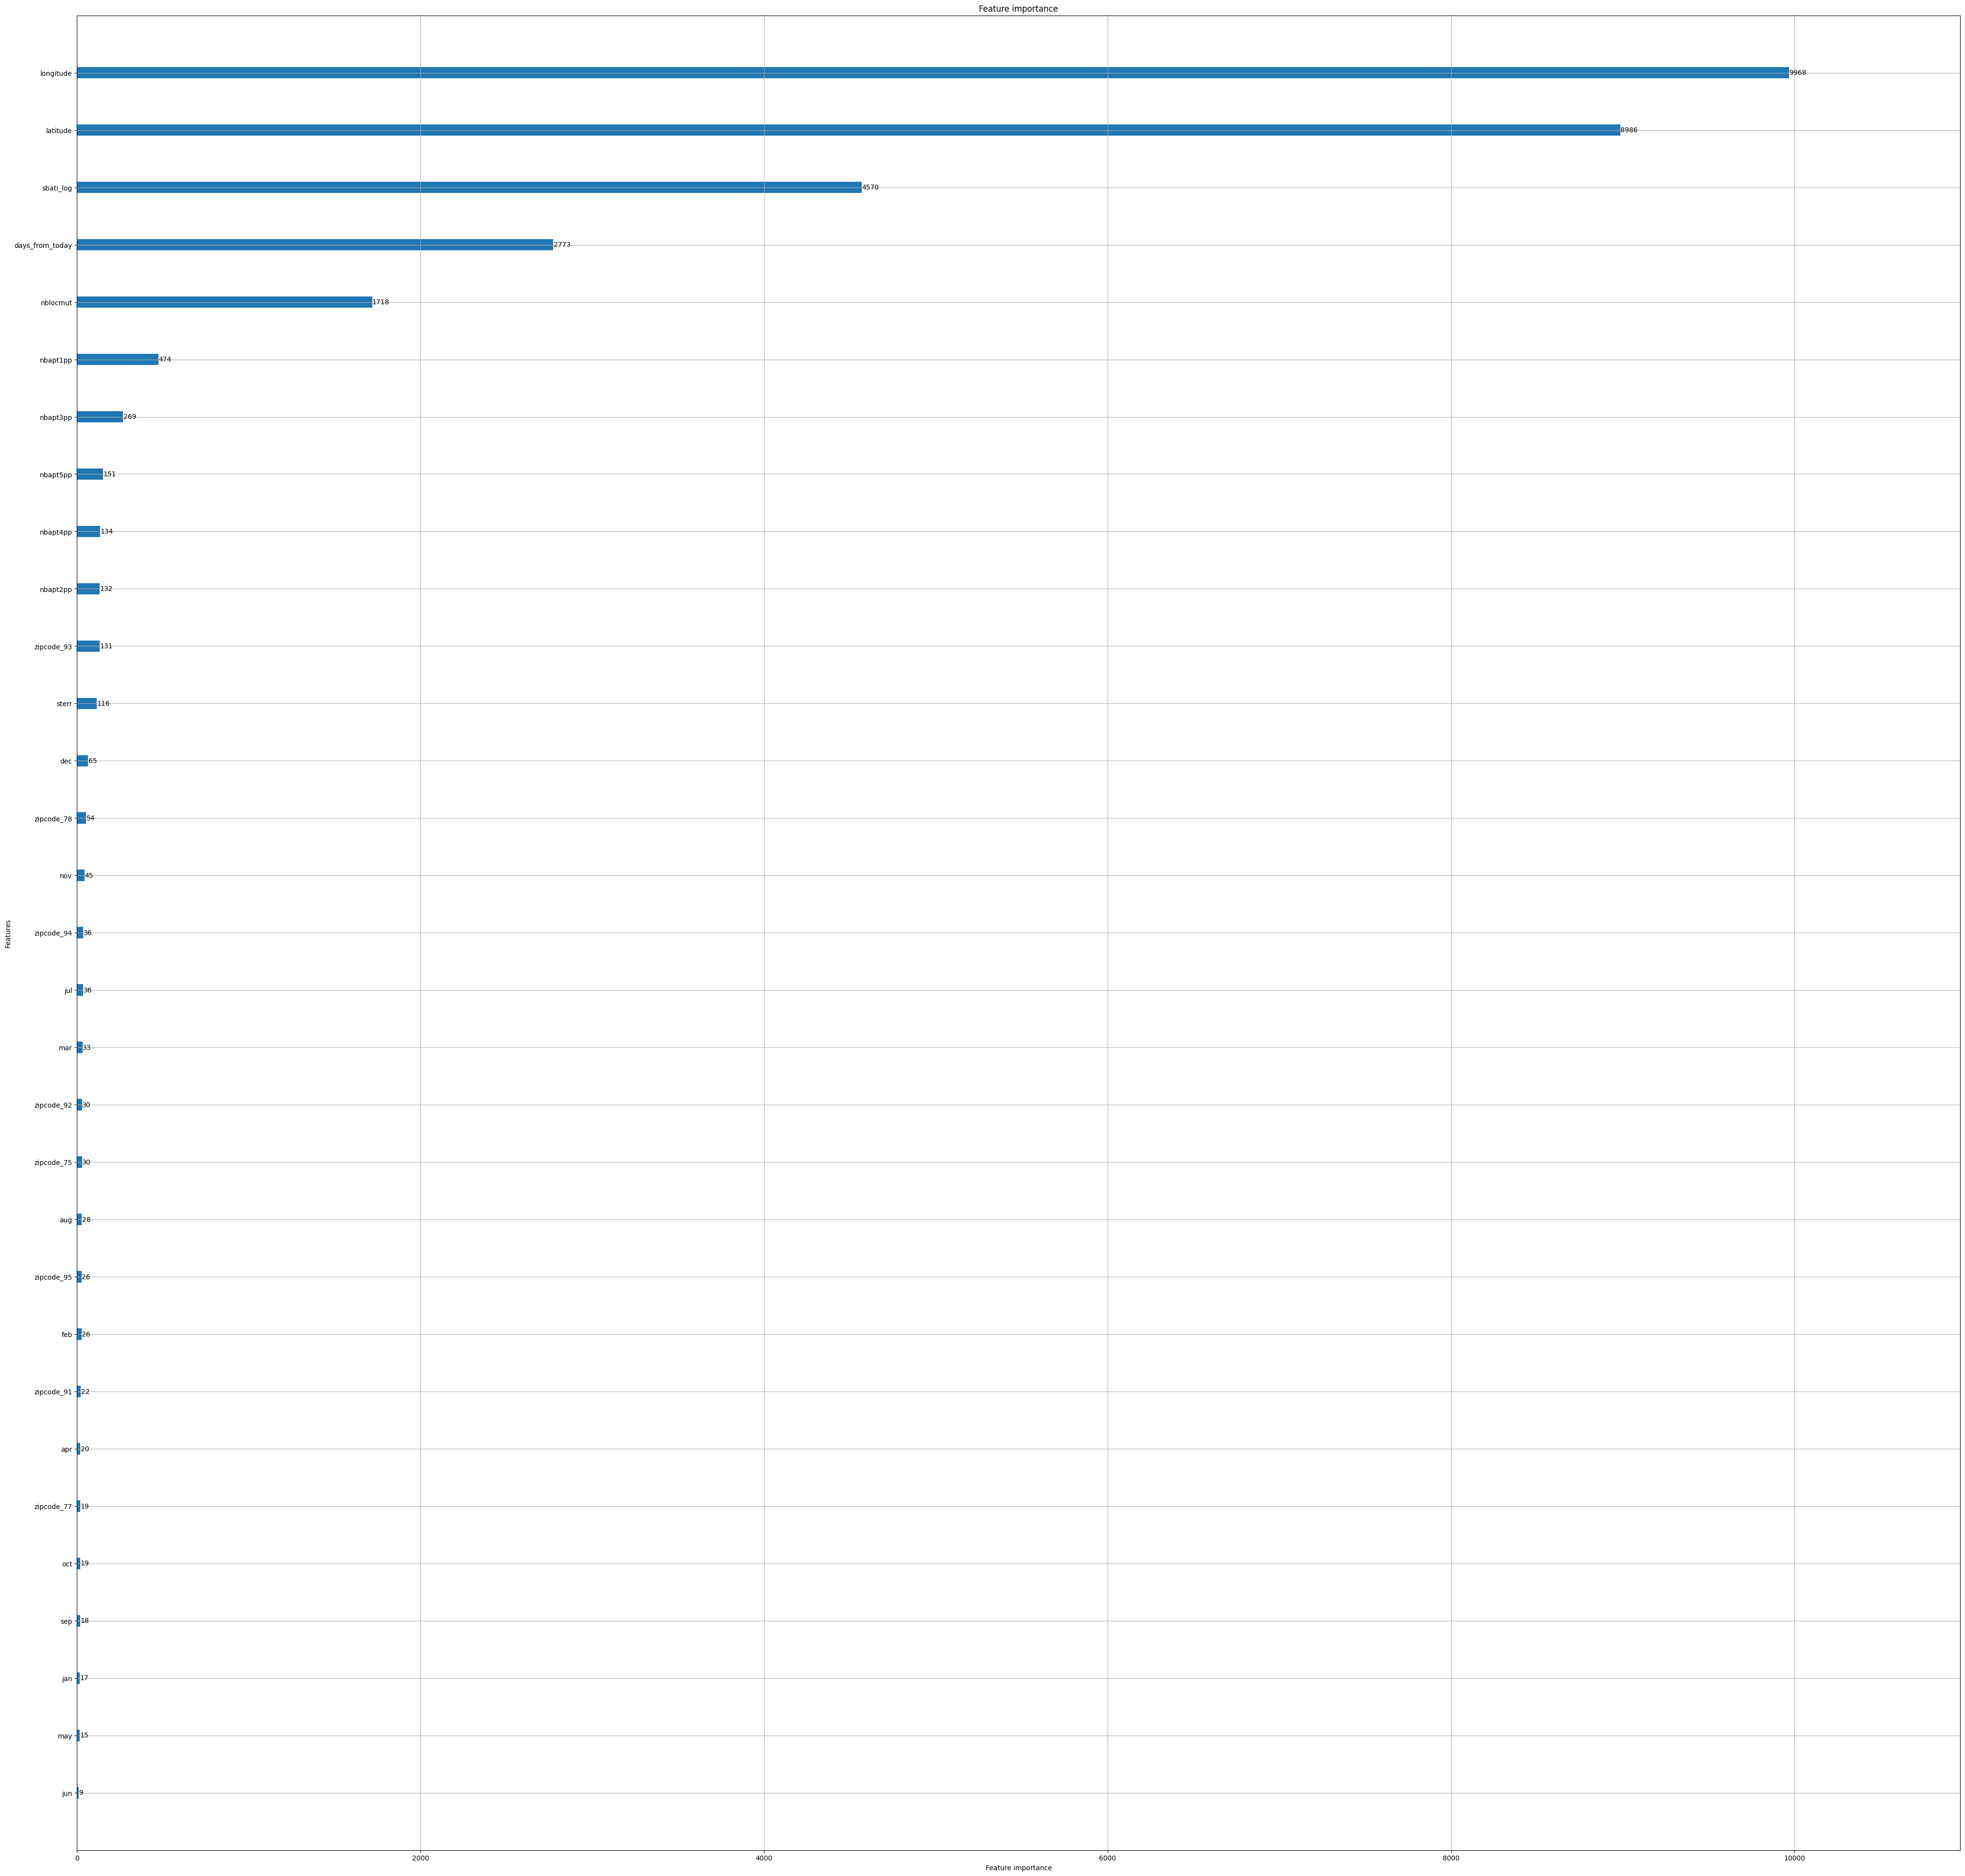

In [ ]:
from lightgbm import plot_importance
fig, ax = plt.subplots(figsize=(50,50))
plot_importance(model_lgb, ax=ax)
plt.show()

In [ ]:
# Converting the log back to exponential

y_val_1 = np.exp(y_val)
y_pred_1 = np.array(y_pred_lgb)
y_pred_1 = np.exp(y_pred_1+0.2)

In [ ]:
df_1 = pd.DataFrame()
df_1['y_val_1'] = y_val_1
df_1['y_pred_1'] = y_pred_1

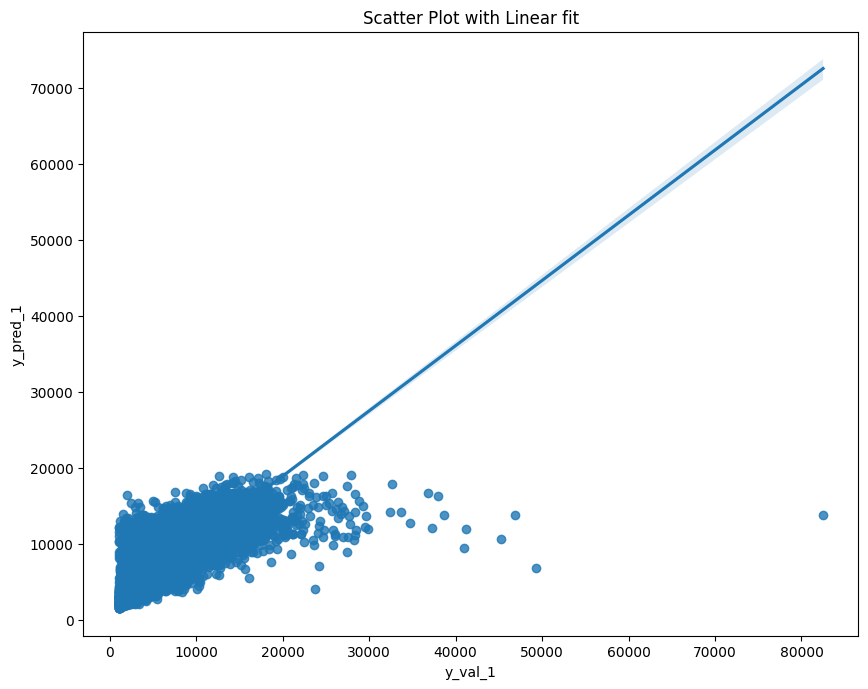

In [ ]:
import seaborn as sns

plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
sns.regplot(x='y_val_1', y='y_pred_1', data=df_1)
plt.title("Scatter Plot with Linear fit");


In [ ]:
rmse = np.sqrt(metrics.mean_squared_error(y_val_1, y_pred_1))
print("RMSE: %f" % (rmse))

RMSE: 1810.024104


In [ ]:
#Mean percentage difference
Mean_diff = np.mean(abs(y_val_1-y_pred_1)/y_val_1)
print('Mean percentage difference: ', Mean_diff)
#Median percentage difference
Median_diff = np.median(abs(y_val_1-y_pred_1)/y_val_1)
print('Median percentage difference: ', Median_diff)

Mean percentage difference:  0.2838155759320586
Median percentage difference:  0.2040273231122083


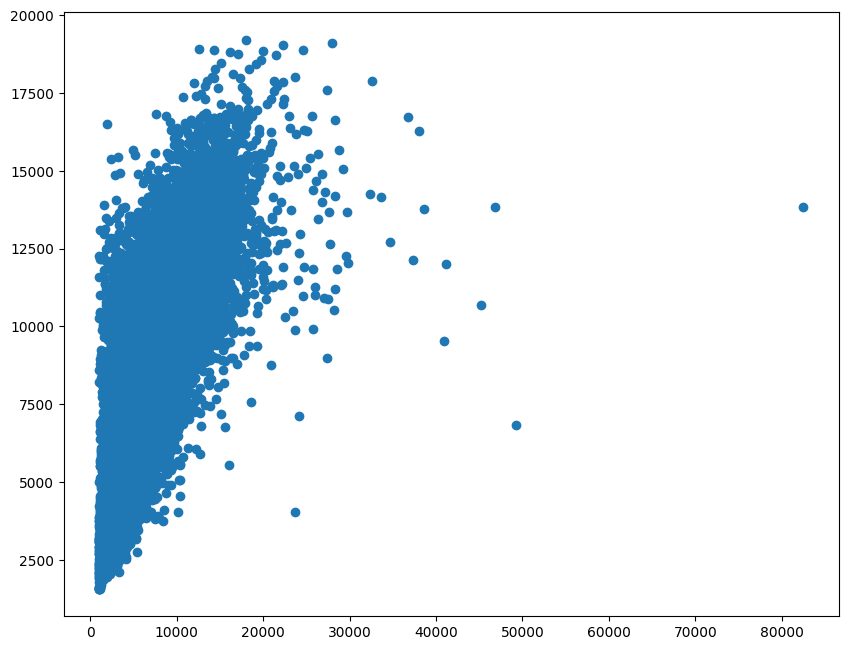

In [ ]:
plt.scatter(y_val_1, y_pred_1)

In [ ]:
#Read the test set
df_test = pd.read_csv('/content/drive/MyDrive/hackathon-data/test_set_student_usable_v1.csv')

In [ ]:
# Select the explanatory variables from the test dataset.
set_1 = ['sbati_log', 'sterr', 'nblocmut', 'nblocmai',
         'nblocapt', 'nblocdep', 'nblocact', 'nbapt1pp', 'nbapt2pp','days_from_today',
         'nbapt3pp', 'nbapt4pp', 'nbapt5pp', 'jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul',
         'aug', 'sep', 'oct', 'nov', 'dec', 'sbati',
         'longitude', 'latitude', 'zipcode_75', 'zipcode_77', 'zipcode_78', 'zipcode_91', 'zipcode_92', 'zipcode_93', 'zipcode_94', 'zipcode_95',
        ]

X_test_t = df_test.loc[:, set_1]

In [ ]:
# Seperate the output value
y_test = df_test['val_sbati_log']
y_test_1 = df_test['val_sbati']

In [ ]:
# Obtain predictions on the test set
y_pred_test = model_lgb.predict(X_test_t)
# Obtain RMSE to understand our performance.
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))
print("RMSE: %f" % (rmse))

RMSE: 0.315005


In [ ]:
#Convert to numpy 
y_test = y_test.to_numpy()
y_test_1 = y_test_1.to_numpy()

In [ ]:
#Convert predictions back to training

y_pred_1 = np.array(y_pred_test)
y_pred_1 = np.exp(y_pred_1+0.2)

Residual = abs(y_test_1-y_pred_1)
Residual_log = abs(y_test-y_pred_test)
Residual_per = abs(y_test_1-y_pred_1)/y_test_1

rmse = np.sqrt(metrics.mean_squared_error(y_test_1, y_pred_1))
print("RMSE: %f" % (rmse))

RMSE: 993.024410


In [ ]:
#Mean percentage difference
Mean_diff = np.mean(Residual_per)
print('Mean percentage difference: ', Mean_diff)
#Median percentage difference
Median_diff = np.median(Residual_per)
print('Median percentage difference: ', Median_diff)

Mean percentage difference:  0.13217676667522688
Median percentage difference:  0.1156143813864314


{'boxes': [<matplotlib.lines.Line2D at 0x7f024fec7e10>],
 'caps': [<matplotlib.lines.Line2D at 0x7f024fec1dd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f024feb8d90>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f024fec1310>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f024fec7890>,
  <matplotlib.lines.Line2D at 0x7f024fec7350>]}

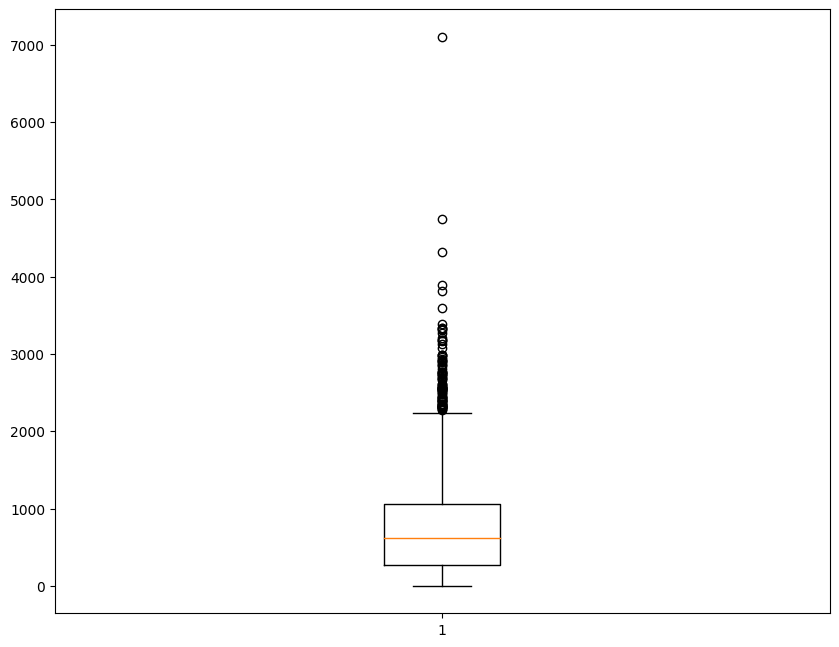

In [ ]:
plt.boxplot(Residual)

{'boxes': [<matplotlib.lines.Line2D at 0x7f0249c21c50>],
 'caps': [<matplotlib.lines.Line2D at 0x7f0249c29c90>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f0249c31cd0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f0249c31790>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f0249c29210>,
  <matplotlib.lines.Line2D at 0x7f0249c29750>]}

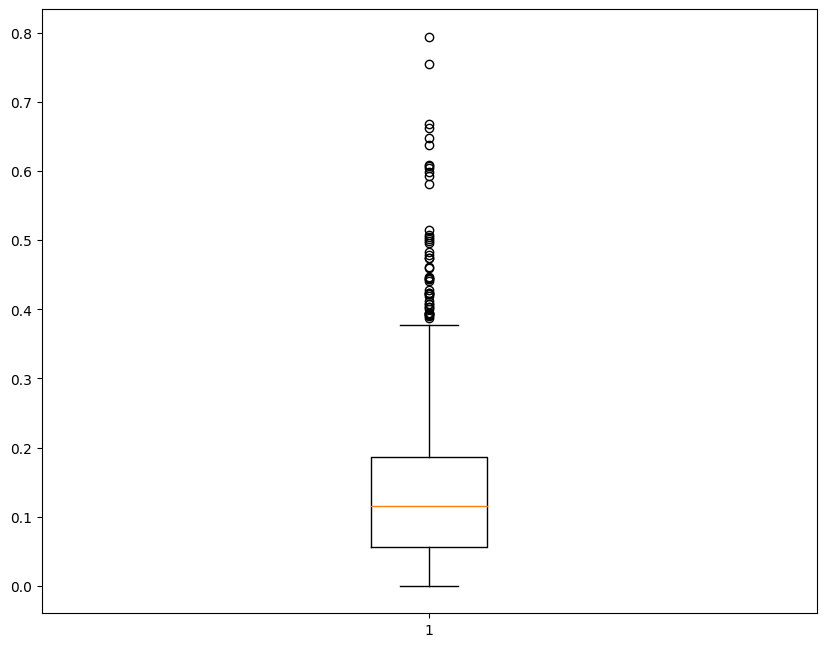

In [ ]:
plt.boxplot(Residual_per)

Text(0, 0.5, 'Predicted')

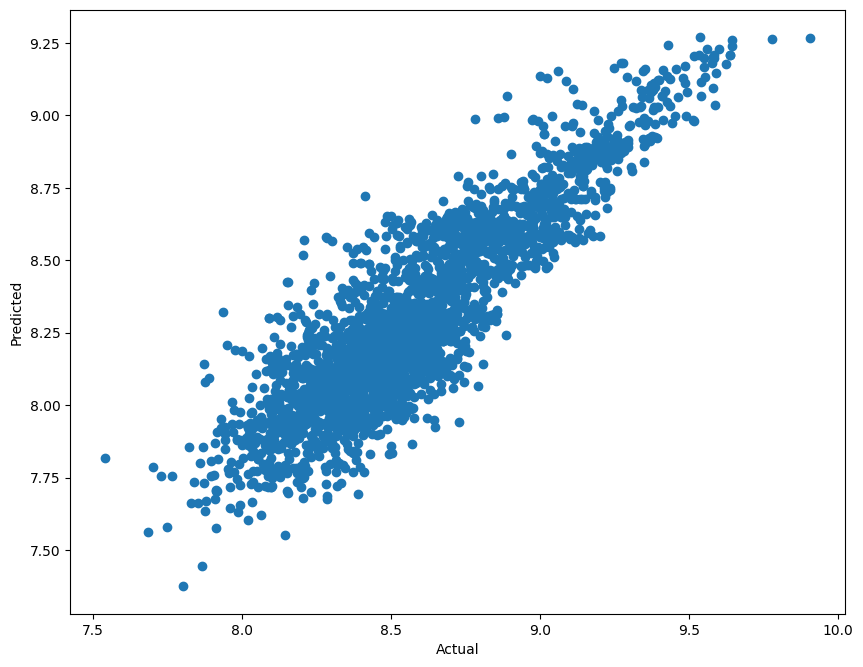

In [ ]:
plt.scatter(y_test, y_pred_test)
plt.xlabel('Actual')
plt.ylabel('Predicted')

Text(0, 0.5, 'Predicted')

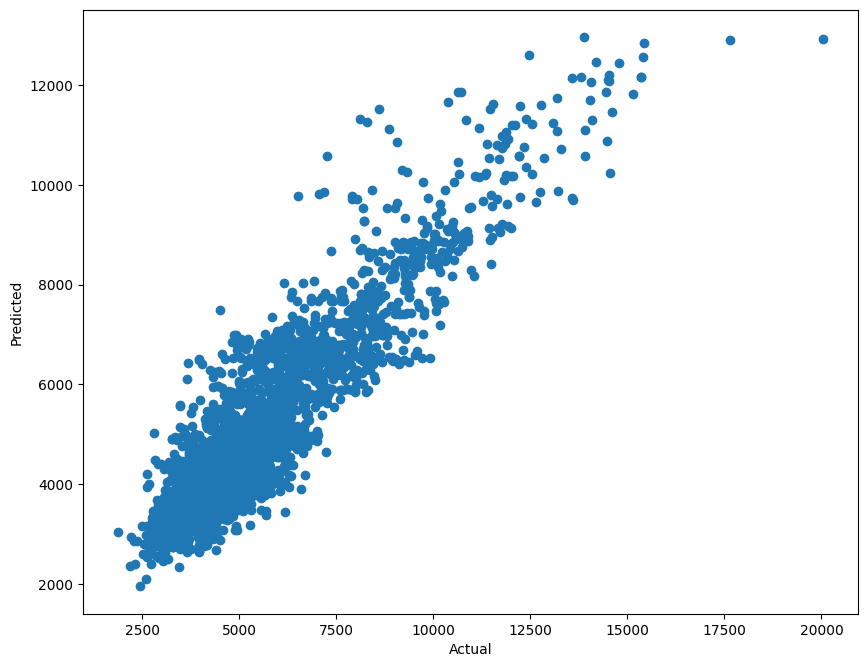

In [ ]:
plt.scatter(y_test_1, y_pred_1)
plt.xlabel('Actual')
plt.ylabel('Predicted')